In [1]:
import numpy as np
import pandas as pd
import scipy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import datetime

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1 Import data

#### Import Data

In [2]:
pd.set_option('display.max_colwidth', None) # Display full table information
filename_data='data/stock_data.csv'
data = pd.read_csv(filename_data)
data['Sentiment'].loc[(data['Sentiment'] == -1)] = 0
print(data.shape)
data.head(10)

(5791, 2)


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Text,Sentiment
0,"Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 or method 2, see prev posts",1
1,user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year. AWESOME.,1
2,user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend will break. Otherwise just a short-term correction in med-term downtrend.,0
7,Monday's relative weakness. NYX WIN TIE TAP ICE INT BMC AON C CHK BIIB,0
8,GOOG - ower trend line channel test & volume support.,1
9,AAP will watch tomorrow for ONG entry.,1


## 2 Inferential Statistics

In [3]:
# data.loc[(data['Sentiment'] == -1)] = 0
count = len(data.Sentiment)
count_zero= data.loc[data['Sentiment'] == 0]
number_of_zeros= len(count_zero)
count_one = data.loc[data['Sentiment'] == 1]
number_of_ones = len(count_one)

print(' Total amount of values:' ,  count,"\n",'Total number of times Stock rose or stayed the same: ', 
      number_of_ones, "\n", "Total number of times Stock fell", number_of_zeros)

 Total amount of values: 5791 
 Total number of times Stock rose or stayed the same:  3685 
 Total number of times Stock fell 2106


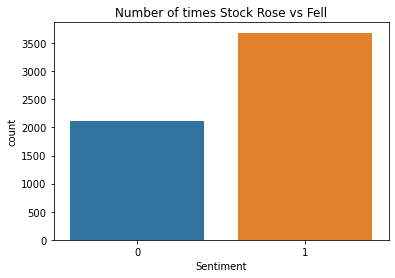

In [4]:
g = sns.countplot(x='Sentiment', data=data).set_title('Number of times Stock Rose vs Fell')

Text(0.5, 1.0, 'Number of times Stock Rose vs Fell')

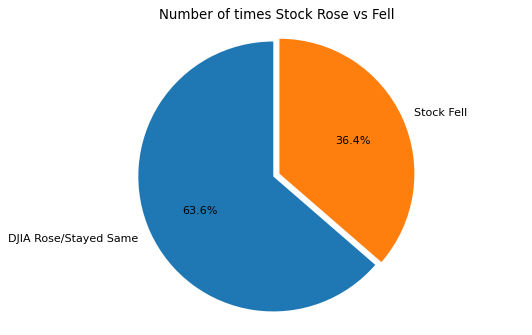

In [5]:
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
numbers =  [number_of_ones, number_of_zeros]
explode = (0, 0.05)
labels= ['DJIA Rose/Stayed Same', 'Stock Fell']
plt.pie(numbers, explode =explode, labels = labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Number of times Stock Rose vs Fell')

## 3 Data Wrangling

#### 3.1 Data Cleaning and feature engineeing

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer

lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words('english'))

In [7]:
print("1)",data['Text'][0])
text = re.sub('[^a-zA-Z]'," ",data['Text'][0]) # clearing special characters and numbers
print("2)",text)
text = text.lower()                            # lower
print("3)",text)
text = word_tokenize(text,language='english')  # split
print("4)",text)
text1 = [word for word in text if not word in stopwordSet] #clearing stopwords like "to", "it", "over"
text2 = [lemma.lemmatize(word) for word in text]           #same thing
text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet] # I prefer using both but as you can see they are same
print("5.1)",text1)
print("5.2)",text2)
print("5)",text)
text = " ".join(text)                          # list -> string
print("6)",text)

1) Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts
2) Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method   or method    see prev posts
3) kickers on my watchlist xide tit soq pnk cpw bpz aj  trade method   or method    see prev posts
4) ['kickers', 'on', 'my', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'aj', 'trade', 'method', 'or', 'method', 'see', 'prev', 'posts']
5.1) ['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'aj', 'trade', 'method', 'method', 'see', 'prev', 'posts']
5.2) ['kicker', 'on', 'my', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'aj', 'trade', 'method', 'or', 'method', 'see', 'prev', 'post']
5) ['kicker', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'aj', 'trade', 'method', 'method', 'see', 'prev', 'post']
6) kicker watchlist xide tit soq pnk cpw bpz aj trade method method see prev post


In [8]:
textList = list()
for i in range(len(data)):
    text = re.sub('[^a-zA-Z]'," ",data['Text'][i])
    text = text.lower()
    text = word_tokenize(text,language='english')
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    textList.append(text)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

cv = CountVectorizer(max_features=5000)  # It can change max_features to see different results
x = cv.fit_transform(textList).toarray() # strings to 1 and 0
#cvs = x.sum(axis=0)
#print(cvs)          # to see word sum column by column

y = np.array(data["Sentiment"])

pca = PCA(n_components=128) # It can change n_components to see different results
x = pca.fit_transform(x)    # fits 5000 columns to 256 with minimal loss

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=19) # splitting x and y for train/test

## 4 Modelling

#### 4.0 Global functions

In [10]:
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score,recall_score,roc_curve,auc,roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import seaborn as sn
import matplotlib.pyplot as plt

In [11]:
def confusion_matrix_plot(y_actual,y_predict,title='Confusion Matrix'):
    Cmatrix = confusion_matrix(y_actual,y_predict)
    print('confusion matrix:')
    print(Cmatrix)
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(Cmatrix, 
                annot=True, 
                fmt='.0f', 
                xticklabels=[0,1], 
                yticklabels=[0,1], 
                cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [12]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [13]:
# ROC Curves metric
'''
    Plot ROC curves for the multiclass problem
    based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
'''
def ROCCurves (Actual, Predicted):
    
    # Compute ROC curve and ROC area for each class
    n_classes = 2
    fpr = dict()
    tpr = dict()
    roc_auc= dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Actual, Predicted)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Actual.ravel(), Predicted.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    ##############################################################################

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolate all ROC curves at this points (include FPR, TPR)
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr[1], tpr[1], label = 'ROC curve of class (area = {1:0.2f})'
                                   ''.format(i, roc_auc[1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")

In [14]:
# Evaluation Model build for analyzing model performance
'''
    Prints and plots
    - classification report
    - confusion matrix
    - ROC-AUC
'''
def Evaluation (Method,Comment,Actual, Predicted):

    print (Method)
    print (Comment)
    print (classification_report(Actual,Predicted))
    
    ROC_AUC = roc_auc_score(Actual,Predicted)    
    Precision = precision_score(Actual,Predicted)
    Accuracy = accuracy_score(Actual,Predicted)
    Recall = recall_score(Actual,Predicted)
    F1 = f1_score(Actual,Predicted)
    
    print ('ROC-AUC: ' + str(ROC_AUC))
    print("accuracy:",Accuracy)
    print("f score:",F1)

#### 4.1 SVM

##### 4.1.1 Basline SVM

In [15]:
#Create a svm Classifier
svc_base = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
svc_base.fit(x_train, y_train)
#Predict the response for train dataset
predict_train=svc_base.predict(x_train)

SVC(kernel='linear')
Baseline SVM report
              precision    recall  f1-score   support

           0       0.71      0.50      0.59      1689
           1       0.76      0.88      0.82      2943

    accuracy                           0.75      4632
   macro avg       0.74      0.69      0.70      4632
weighted avg       0.74      0.75      0.73      4632

ROC-AUC: 0.6941162731326826
accuracy: 0.7454663212435233
f score: 0.8152327221438646
K-fold Train Accuracy: 73.27 %
confusion matrix:
[[ 852  837]
 [ 342 2601]]


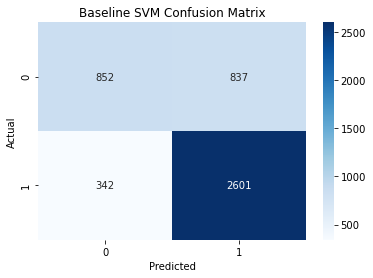

In [16]:
Evaluation(svc_base,'Baseline SVM report',y_train, predict_train)
accuracies = cross_val_score(estimator = svc_base, X = x_train, y = y_train, cv = 5)
print("K-fold Train Accuracy: {:.2f} %".format(accuracies.mean()*100))
confusion_matrix_plot(y_train,predict_train,title='Baseline SVM Confusion Matrix')

##### 4.1.2 Grid Search - SVM Hyperparameter Tuning

In [17]:
svc_gs = svm.SVC(probability = True)
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [0.1, 1, 10]},
#               {'kernel': ['poly'], 'gamma': [1e-3, 1e-4],'degree':[2,3,4],'C': [0.1, 1, 10]},
#               {'kernel': ['linear'], 'C': [0.1, 1, 10]},]
# define search space
parameters = { 'C':[0.1,1,10],'kernel':['rbf','poly','sigmoid','linear'],'degree':[2,3,4],'gamma': [1, 0.1, 0.01, 0.001]}
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# define the search
search_grid = GridSearchCV(svc_gs, parameters,n_jobs=-1,cv = cv) # 5 fold CV
search_grid.fit(x_train, y_train)

# report the best result
search_grid.best_estimator_,search_grid.best_params_,search_grid.best_score_

(SVC(C=10, degree=2, gamma=0.1, probability=True),
 {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'},
 0.7433090789630032)

In [18]:
#Store result by different parameters
res_grid=pd.DataFrame(search_grid.cv_results_)
res_grid.sort_values(by=['mean_test_score'],ascending=False)
res_grid.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,28.885533,0.906906,0.935474,0.025570,0.1,2,1,rbf,"{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}",0.662352,...,0.664147,0.651188,0.669903,0.660194,0.652268,0.663067,0.666307,0.660513,0.005633,95
1,21.327537,1.397151,0.604786,0.053462,0.1,2,1,poly,"{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}",0.735707,...,0.713823,0.733261,0.725998,0.713053,0.737581,0.724622,0.717063,0.724527,0.011452,34
2,23.463705,1.770847,0.631709,0.046764,0.1,2,1,sigmoid,"{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'sigmoid'}",0.675297,...,0.679266,0.693305,0.656958,0.652643,0.686825,0.680346,0.664147,0.670881,0.013214,92


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})
Grid Search SVM report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1689
           1       0.89      0.94      0.92      2943

    accuracy                           0.89      4632
   macro avg       0.89      0.87      0.88      4632
weighted avg       0.89      0.89      0.89      4632

ROC-AUC: 0.8715297581219004
accuracy: 0.8914075993091537
f score: 0.9170651277823578
confusion matrix:
[[1348  341]
 [ 162 2781]]


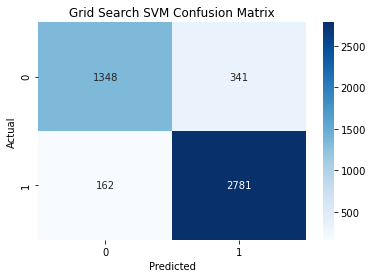

In [19]:
predict_train_gs=search_grid.predict(x_train)
Evaluation(search_grid,'Grid Search SVM report',y_train, predict_train_gs)
# accuracies = cross_val_score(estimator = search_grid, X = x_train, y = y_train, cv = 5)
# print("K-fold Train Accuracy: {:.2f} %".format(accuracies.mean()*100))
confusion_matrix_plot(y_train,predict_train_gs,title='Grid Search SVM Confusion Matrix')

In [49]:
res_grid.to_csv('svm_grid_model.csv')

In [63]:
import pickle
# save the model to disk
filename = 'res_grid_svm.sav'
pickle.dump(search_grid, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

##### 4.1.3 Bayes Search - SVM Hyperparameter Tuning

In [20]:
# automatic svm hyperparameter tuning
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

svc_bayes = svm.SVC(probability = True)
# define search space
params_bayes = dict()
params_bayes['C'] = (1e-6, 100.0, 'log-uniform')
params_bayes['gamma'] = (1e-6, 100.0, 'log-uniform')
params_bayes['degree'] = [2,3,4]
params_bayes['kernel'] = ['rbf','poly','sigmoid','linear']
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# define the search
search_bayes = BayesSearchCV(estimator=svc_bayes, search_spaces=params_bayes, n_jobs=-1, cv=cv)
search_bayes.fit(x_train, y_train)
# report the best result
search_bayes.best_estimator_,search_bayes.best_params_,search_bayes.best_score_

(SVC(C=100.0, degree=4, gamma=0.01800692889301284, probability=True),
 OrderedDict([('C', 100.0),
              ('degree', 4),
              ('gamma', 0.01800692889301284),
              ('kernel', 'rbf')]),
 0.739961139896373)

In [21]:
#Store result by different parameters
res_bayes=pd.DataFrame(search_bayes.cv_results_)
res_bayes.sort_values(by=['mean_test_score'],ascending=False)
res_bayes.head(3)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,...,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params
0,0.635383,0.635383,0.636069,0.634989,0.634989,0.635383,0.635383,0.636069,0.634989,0.634989,...,34,15.140936,1.317089,0.546150,0.012542,0.008700,3,0.020194,sigmoid,"{'C': 0.008699831279373186, 'degree': 3, 'gamma': 0.020193638624028093, 'kernel': 'sigmoid'}"
1,0.635383,0.635383,0.636069,0.634989,0.634989,0.635383,0.635383,0.636069,0.634989,0.634989,...,34,11.978823,1.448420,0.415079,0.004731,0.000004,4,0.072751,linear,"{'C': 3.5738940794347435e-06, 'degree': 4, 'gamma': 0.07275139155346937, 'kernel': 'linear'}"
2,0.635383,0.635383,0.636069,0.634989,0.634989,0.635383,0.635383,0.636069,0.634989,0.634989,...,34,14.703234,1.132220,0.541215,0.012593,0.000052,4,0.065525,sigmoid,"{'C': 5.1503018169921715e-05, 'degree': 4, 'gamma': 0.06552526357761956, 'kernel': 'sigmoid'}"


In [22]:
# predict_train_bayes=search_bayes.predict(x_train)
# print(classification_report(y_train,predict_train_bayes))
# # accuracies = cross_val_score(estimator = search_bayes, X = x_train, y = y_train, cv = 5)
# # print("K-fold Train Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("train Accuracy:",metrics.accuracy_score(y_train, predict_train_bayes))
# confusion_matrix_plot(y_train,predict_train_bayes,title='Bayes Search SVM Confusion Matrix')

##### 4.1.4 SVM Learning Curve

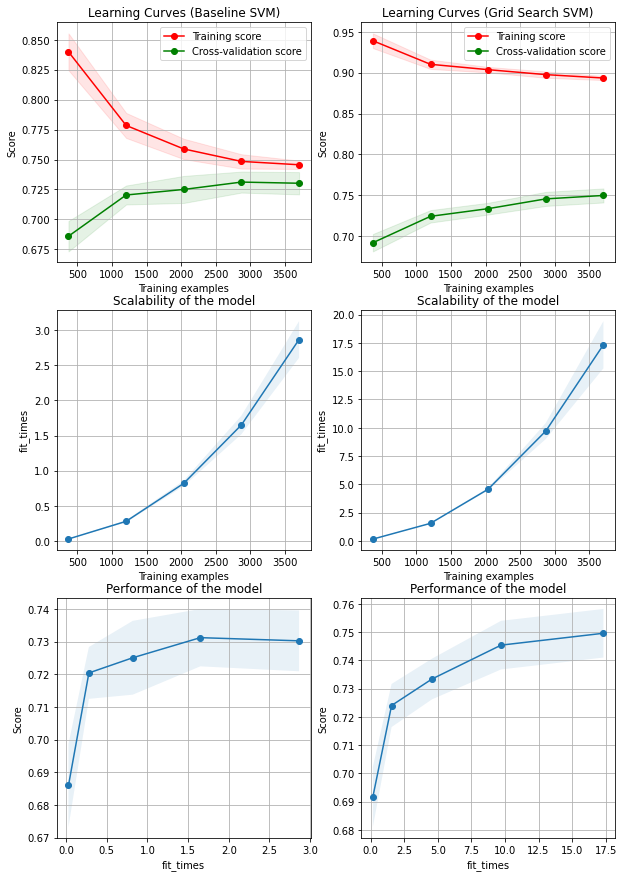

In [23]:
from sklearn.svm import SVC
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Baseline SVM)"
cv1 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
plot_learning_curve(estimator=svc_base, title = title, X=x_train, y=y_train, axes=axes[:, 0],
                    cv=cv1, n_jobs=-1)

title2 = "Learning Curves (Grid Search SVM)"
cv2 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
est = svm.SVC(C=10, degree=2, gamma=0.1, kernel='rbf', probability=True)
plot_learning_curve(estimator = est, title = title2, X = x_train, y = y_train, axes=axes[:, 1],
                    cv=cv2, n_jobs=-1)

plt.show()

#### 4.2 MLP

In [26]:
from skorch import NeuralNetClassifier
import torch
from torch import nn
import torch.nn.functional as F
from skorch.callbacks import EarlyStopping
import scipy

In [27]:
x_train_tensor = torch.tensor(np.array(x_train)).float()
x_test_tensor = torch.tensor(np.array(x_test)).float()

y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

In [28]:
input_dim = x_train.shape[1]
# hidden_dim = int(input_dim/8)
output_dim = 2

##### 4.2.1 Basline MLP

In [29]:
# 1 hidden layer
class MLP_1(nn.Module):
    def __init__(
            self,
            input_dim=128,
            hidden_dim=200,
            output_dim=2,
            dropout=0.5,
    ):
        super(MLP_1, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

In [30]:
# 2 hidden layers
class MLP_2(nn.Module):
    def __init__(
            self,
            input_dim=128,
            hidden_dim_1=200,
            hidden_dim_2=150,
            output_dim=2,
            dropout=0.3,
    ):
        super(MLP_2, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu

        self.hidden1 = nn.Linear(input_dim, hidden_dim_1)
        self.hidden2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.output = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, X, **kwargs):
        X = self.activation(self.hidden1(X))
        X = self.dropout(X)
        X = self.activation(self.hidden2(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

In [31]:
torch.manual_seed(0)
MLP_base = NeuralNetClassifier(
    MLP_1,
    max_epochs=20,
    lr=0.1, # 0.05,0.1
    batch_size=32, #64 32 128
    criterion = nn.CrossEntropyLoss,
#     optimizer__weight_decay=1e-2,
    optimizer__momentum=0.95, #0.5 0.95
#     optimizer__nesterov = True,
#     optimizer=torch.optim.Adam,
    callbacks=[EarlyStopping()],
    device= 'cuda' if torch.cuda.is_available() else 'cpu'
)
MLP_base.fit(x_train_tensor, y_train_tensor);

/opt/conda/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6364       0.7206        0.5775  0.2839
      2        0.5693       0.7465        0.5536  0.1862
      3        0.5569       0.7422        0.5524  0.1831
      4        0.5483       0.7476        0.5520  0.1826
      5        0.5452       0.7519        0.5543  0.1801
      6        0.5416       0.7605        0.5479  0.1860
      7        0.5362       0.7562        0.5498  0.1844
      8        0.5290       0.7487        0.5525  0.1850
      9        0.5223       0.7443        0.5609  0.1861
     10        0.5227       0.7508        0.5570  0.1873
Stopping since valid_loss has not improved in the last 5 epochs.


In [32]:
from sklearn.metrics import accuracy_score
predict_train_MLP = MLP_base.predict(x_train_tensor)
accuracy_score(y_train_tensor, predict_train_MLP)

0.7929620034542314

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP_1(
    (dropout): Dropout(p=0.5, inplace=False)
    (hidden): Linear(in_features=128, out_features=200, bias=True)
    (output): Linear(in_features=200, out_features=2, bias=True)
  ),
)
Baseline MLP report
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1689
           1       0.84      0.83      0.84      2943

    accuracy                           0.79      4632
   macro avg       0.78      0.78      0.78      4632
weighted avg       0.79      0.79      0.79      4632

ROC-AUC: 0.7792995873641823
accuracy: 0.7929620034542314
f score: 0.835871983570084
confusion matrix:
[[1231  458]
 [ 501 2442]]


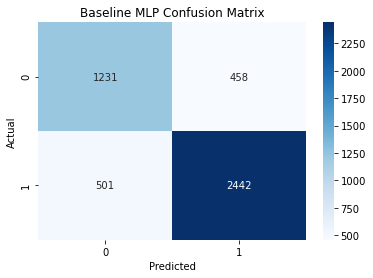

In [33]:
Evaluation(MLP_base,'Baseline MLP report',y_train, predict_train_MLP)
# accuracies = cross_val_score(estimator = MLP_base, X = x_train_tensor.float(), y = torch.tensor(predict_train_MLP).float(), cv = 5)
# print("K-fold Train Accuracy: {:.2f} %".format(accuracies.mean()*100))
confusion_matrix_plot(y_train,predict_train_MLP,title='Baseline MLP Confusion Matrix')

##### 4.2.2 Grid Search - MLP Hyperparameter Tuning

In [34]:
torch.manual_seed(0)
MLP_grid = NeuralNetClassifier(
    MLP_1,
    max_epochs=20,
    lr=0.1,
#     batch_size=32,
#     optimizer__momentum=0.95,
    callbacks=[EarlyStopping()],
    device= 'cuda' if torch.cuda.is_available() else 'cpu'
)
MLP_grid.fit(x_train_tensor, y_train_tensor);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6653       0.6354        0.6507  0.0886
      2        0.6474       0.6354        0.6430  0.0828
      3        0.6374       0.6354        0.6346  0.0852
      4        0.6299       0.6354        0.6256  0.0857
      5        0.6212       0.6548        0.6158  0.0846
      6        0.6099       0.6677        0.6060  0.0811
      7        0.5982       0.6796        0.5961  0.0805
      8        0.5918       0.6969        0.5874  0.0810
      9        0.5822       0.7066        0.5795  0.0817
     10        0.5727       0.7120        0.5724  0.0844
     11        0.5689       0.7120        0.5663  0.0876
     12        0.5630       0.7131        0.5609  0.0867
     13        0.5548       0.7152        0.5562  0.0820
     14        0.5493       0.7217        0.5516  0.0825
     15        0.5475       0.7271        0.5478  0.0820
     16        0.5385       0.7

In [35]:
from sklearn.model_selection import GridSearchCV
params = {
    'lr': [0.01,0.05,0.1],
    'module__hidden_dim':[32,64,128],
    'module__dropout': [0.1, 0.5, 0.9],
    'iterator_valid__batch_size':[32, 64, 128],
    'optimizer__momentum':[0.3, 0.5, 0.9, 0.95],
}
gs = GridSearchCV(MLP_base, params, refit=False, n_jobs=-1, cv=5, scoring='accuracy', verbose=2)
gs.fit(x_train_tensor, y_train_tensor)
print(gs.best_score_, gs.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  7.1min


0.7394211569870526 {'iterator_valid__batch_size': 128, 'lr': 0.05, 'module__dropout': 0.9, 'module__hidden_dim': 128, 'optimizer__momentum': 0.9}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  7.9min finished


In [36]:
print(gs.best_score_, gs.best_params_)

0.7394211569870526 {'iterator_valid__batch_size': 128, 'lr': 0.05, 'module__dropout': 0.9, 'module__hidden_dim': 128, 'optimizer__momentum': 0.9}


In [37]:
MLP_res_grid=pd.DataFrame(gs.cv_results_)
MLP_res_grid.sort_values(by=['mean_test_score'],ascending=False)
MLP_res_grid.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_iterator_valid__batch_size,param_lr,param_module__dropout,param_module__hidden_dim,param_optimizer__momentum,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.808050,0.043796,0.033800,0.000679,32,0.01,0.1,32,0.3,"{'iterator_valid__batch_size': 32, 'lr': 0.01, 'module__dropout': 0.1, 'module__hidden_dim': 32, 'optimizer__momentum': 0.3}",0.635383,0.635383,0.636069,0.634989,0.634989,0.635363,0.000395,277
1,4.968630,0.280646,0.034730,0.002448,32,0.01,0.1,32,0.5,"{'iterator_valid__batch_size': 32, 'lr': 0.01, 'module__dropout': 0.1, 'module__hidden_dim': 32, 'optimizer__momentum': 0.5}",0.635383,0.635383,0.634989,0.634989,0.634989,0.635147,0.000193,320
2,4.813972,0.047265,0.032988,0.001346,32,0.01,0.1,32,0.9,"{'iterator_valid__batch_size': 32, 'lr': 0.01, 'module__dropout': 0.1, 'module__hidden_dim': 32, 'optimizer__momentum': 0.9}",0.742179,0.725998,0.723542,0.713823,0.723542,0.725817,0.009186,182


In [62]:
import pickle
# save the model to disk
filename = 'res_grid_mlp.sav'
pickle.dump(gs, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [48]:
MLP_res_grid.to_csv('mlp_grid.csv')

In [50]:
# 0.7394211569870526 {'iterator_valid__batch_size': 128, 'lr': 0.05, 'module__dropout': 0.9, 'module__hidden_dim': 128, 'optimizer__momentum': 0.9}
torch.manual_seed(0)
MLP_grid_best = NeuralNetClassifier(
    MLP_1(hidden_dim=128),
    max_epochs=32,
    lr=0.05,
    batch_size=128,
    module__dropout = 0.9,
    optimizer__momentum=0.9,
    callbacks=[EarlyStopping()],
    device= 'cuda' if torch.cuda.is_available() else 'cpu'
)
MLP_grid_best.fit(x_train_tensor, y_train_tensor);

Re-initializing module because the following parameters were re-set: dropout.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6642       0.6354        0.6372  0.1438
      2        0.6358       0.6559        0.6114  0.1025
      3        0.6151       0.6936        0.5885  0.1122
      4        0.5976       0.7163        0.5689  0.1104
      5        0.5927       0.7228        0.5584  0.0961
      6        0.5714       0.7163        0.5459  0.0944
      7        0.5743       0.7174        0.5435  0.1030
      8        0.5608       0.7195        0.5365  0.0910
      9        0.5502       0.7282        0.5286  0.0956
     10        0.5445       0.7335        0.5275  0.0984
     11        0.5463       0.7314        0.5264  0.0943
     12        0.5336       0.7411        0.5203  0.0918
     13        0.5334       0.7357        0.5208  0.1036
     14        0.5298       0.7422        0.5211  0.1011
     15   

In [51]:
from sklearn.metrics import accuracy_score
predict_train_gs_MLP = MLP_grid_best.predict(x_train_tensor)

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP_1(
    (dropout): Dropout(p=0.9, inplace=False)
    (hidden): Linear(in_features=128, out_features=200, bias=True)
    (output): Linear(in_features=200, out_features=2, bias=True)
  ),
)
Baseline MLP report
              precision    recall  f1-score   support

           0       0.77      0.54      0.64      1689
           1       0.78      0.91      0.84      2943

    accuracy                           0.77      4632
   macro avg       0.77      0.72      0.74      4632
weighted avg       0.77      0.77      0.76      4632

ROC-AUC: 0.72431919918354
accuracy: 0.7737478411053541
f score: 0.8358910115878484
confusion matrix:
[[ 915  774]
 [ 274 2669]]


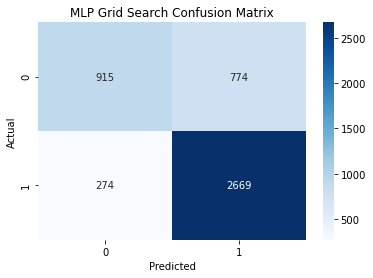

In [52]:
Evaluation(MLP_grid_best,'Baseline MLP report',y_train, predict_train_gs_MLP)
confusion_matrix_plot(y_train,predict_train_gs_MLP,title='MLP Grid Search Confusion Matrix')

##### 4.2.3 MLP Learning Curve

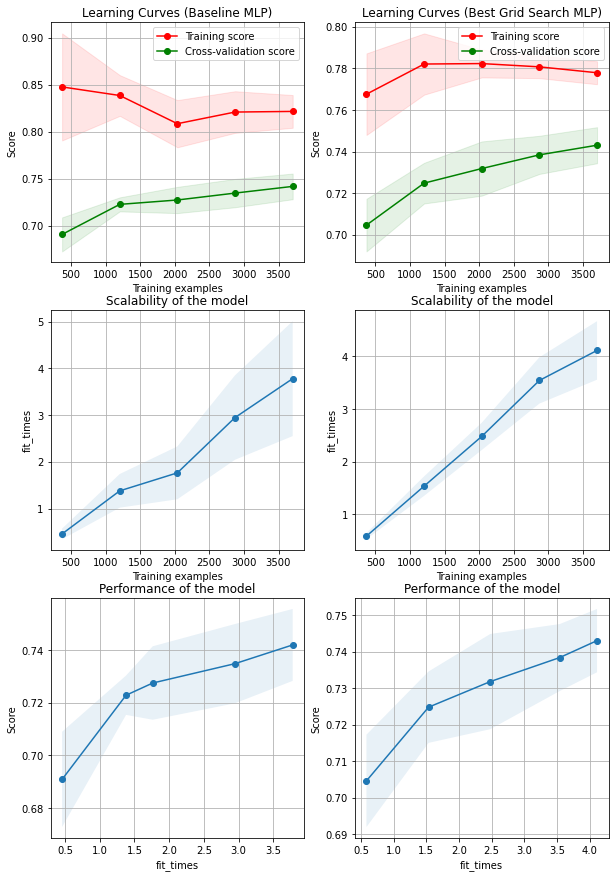

In [53]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Baseline MLP)"
cv1 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

plot_learning_curve(estimator=MLP_base, title = title, X=x_train_tensor, y=y_train_tensor, axes=axes[:, 0],
                    cv=cv1, n_jobs=-1)

title2 = "Learning Curves (Best Grid Search MLP)"
cv2 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

plot_learning_curve(estimator = MLP_grid_best, title = title2, X = x_train_tensor, y = y_train_tensor, axes=axes[:, 1],
                    cv=cv2, n_jobs=-1)

plt.show()

## 5 Comparesion

##### 5.1 Optimised SVMReport in Test Set 

SVC(C=10, degree=2, gamma=0.1, probability=True)
optimised MLP report in test set
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       417
           1       0.78      0.83      0.81       742

    accuracy                           0.74      1159
   macro avg       0.72      0.71      0.71      1159
weighted avg       0.74      0.74      0.74      1159

ROC-AUC: 0.7060847279050075
accuracy: 0.7420189818809318
f score: 0.8054651919323358
confusion matrix:
[[241 176]
 [123 619]]


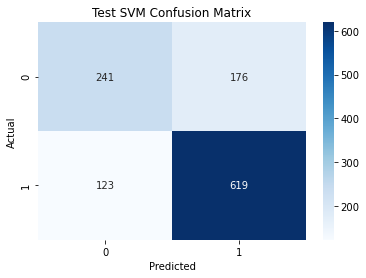

In [54]:
SVM_grid_best = svm.SVC(C=10, gamma=0.1, kernel='rbf', probability=True)
SVM_grid_best.fit(x_train,y_train)
predict_test_gs_MLP = test.predict(x_test)
Evaluation(test,'optimised MLP report in test set',y_test, predict_test_gs_MLP)
confusion_matrix_plot(y_test,predict_test,title='Test SVM Confusion Matrix')

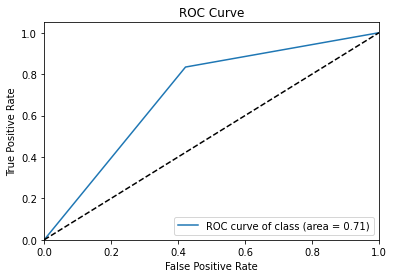

In [55]:
ROCCurves(y_test, predict_test)

##### 5.2 Optimised MLP Report in Test Set 

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP_1(
    (dropout): Dropout(p=0.9, inplace=False)
    (hidden): Linear(in_features=128, out_features=200, bias=True)
    (output): Linear(in_features=200, out_features=2, bias=True)
  ),
)
optimised MLP report in test set
              precision    recall  f1-score   support

           0       0.68      0.48      0.56       417
           1       0.75      0.87      0.81       742

    accuracy                           0.73      1159
   macro avg       0.71      0.67      0.68      1159
weighted avg       0.72      0.73      0.72      1159

ROC-AUC: 0.6745929402030937
accuracy: 0.7299396031061259
f score: 0.8052271313005601
confusion matrix:
[[199 218]
 [ 95 647]]


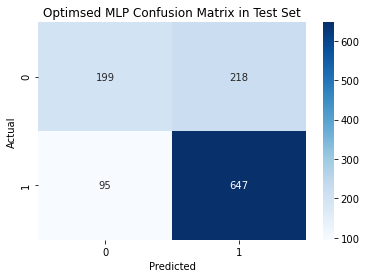

In [56]:
from sklearn.metrics import accuracy_score
predict_test_gs_MLP = MLP_grid_best.predict(x_test_tensor)

Evaluation(MLP_grid_best,'optimised MLP report in test set',y_test, predict_test_gs_MLP)
confusion_matrix_plot(y_test,predict_test_gs_MLP,title='Optimsed MLP Confusion Matrix in Test Set')

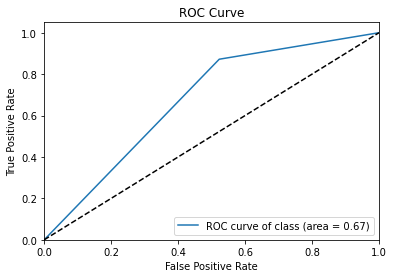

In [57]:
ROCCurves(y_test, predict_test_gs_MLP)

##### 5.3 Learning Curves

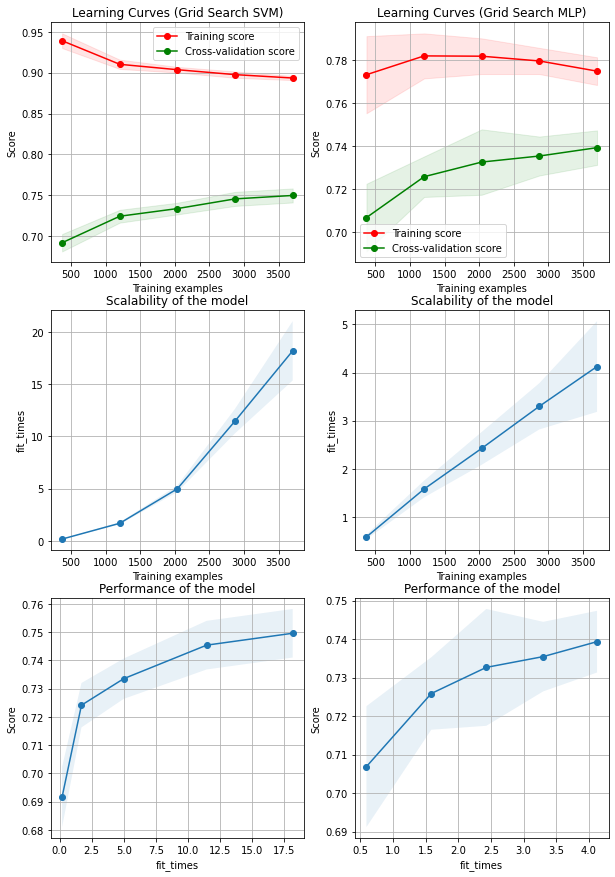

In [58]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Grid Search SVM)"
cv1 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

plot_learning_curve(estimator=SVM_grid_best, title = title, X=x_train_tensor, y=y_train_tensor, axes=axes[:, 0],
                    cv=cv1, n_jobs=-1)

title2 = "Learning Curves (Grid Search MLP)"
cv2 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

plot_learning_curve(estimator = MLP_grid_best, title = title2, X = x_train_tensor, y = y_train_tensor, axes=axes[:, 1],
                    cv=cv2, n_jobs=-1)

plt.show()